### Plot Gravitino results using the DataFrame stored in GravitinoResults.pcl 

In [1]:
import numpy as np
import pandas as pd
import glob,imp,os
from pandas.io.json import json_normalize
import pyslha
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from collections import OrderedDict
import seaborn as sns

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options

#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.5)
cm = plt.cm.get_cmap('RdYlBu')

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
#Merge with SModelS DataFrame
dataDF = pd.read_pickle('GravitinoResults.pcl')
#print(dataDF.columns.values.tolist()) #Print all columns names

In [3]:
#Sort points according to r value:
dataDF = dataDF.sort_values(by=['ExptRes.result0.r'],ascending=False)
dataDF['excluded'] = dataDF['ExptRes.result0.r'] > 1.

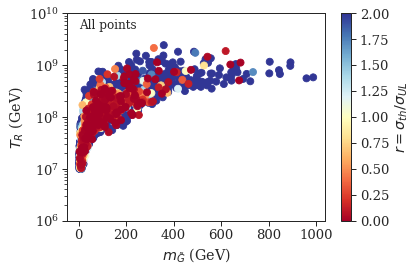

In [4]:
plt.figure()
mG = dataDF['mG']
TR = dataDF['TR']
r = dataDF['ExptRes.result0.r']
x,y,z = mG,TR,r
cp = plt.scatter(x,y, c=z, vmin=0., vmax=2., s=50, cmap=cm)
cb = plt.colorbar(cp)
plt.yscale('log')
plt.xlabel(r'$m_{\tilde{G}}$ (GeV)')    
plt.ylabel(r'$T_{R}$ (GeV)')
cb.set_label(r'$r=\sigma_{th}/\sigma_{UL}$')
plt.ylim(1e6,1e10)
plt.tight_layout()
plt.text(0,5e9, 'All points', fontsize=12)
plt.savefig('Gravitino_all_r.png',dpi=500)
plt.show()

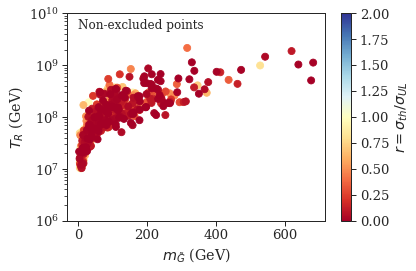

In [5]:
plt.figure()
allowedDF = dataDF[dataDF['ExptRes.result0.r'] < 1.]
mG = allowedDF['mG']
TR = allowedDF['TR']
r = allowedDF['ExptRes.result0.r']
x,y,z = mG,TR,r
cp = plt.scatter(x,y, c=z, vmin=0., vmax=2., s=50, cmap=cm)
cb = plt.colorbar(cp)
plt.yscale('log')
plt.xlabel(r'$m_{\tilde{G}}$ (GeV)')    
plt.ylabel(r'$T_{R}$ (GeV)')
cb.set_label(r'$r=\sigma_{th}/\sigma_{UL}$')
plt.ylim(1e6,1e10)
plt.text(0,5e9, 'Non-excluded points', fontsize=12)
plt.tight_layout()
plt.savefig('Gravitino_allowed_r.png',dpi=500)
plt.show()

/home/lessa/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


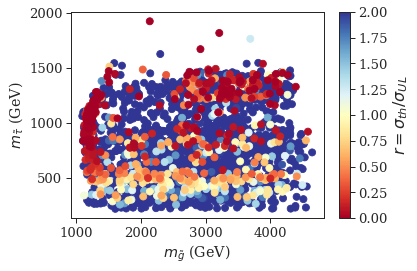

In [6]:
plt.figure()
mgluino = dataDF['mass.1000021']
mstau = dataDF['mass.1000015']
r = dataDF['ExptRes.result0.r']
cm = plt.cm.get_cmap('RdYlBu')
x,y,z = mgluino,mstau,r
cp = plt.scatter(x,y, c=z, vmin=0., vmax=2., s=50, cmap=cm)
cb = plt.colorbar(cp)
# plt.yscale('log')
plt.xlabel(r'$m_{\tilde{g}}$ (GeV)')
plt.ylabel(r'$m_{\tilde{\tau}}$ (GeV)')
cb.set_label(label=r'$r=\sigma_{th}/\sigma_{UL}$',style='italic',family='serif')
font = mpl.font_manager.FontProperties(family='Times New Roman', style='italic', size=16)
cb.ax.yaxis.label.set_font_properties(font)
plt.tight_layout()
plt.show()

In [7]:
def getShortTxname(txList):
    if not isinstance(txList,list):
        return 'None'
    if len(txList) < 1:
        return 'None'
    elif len(txList) == 1:        
        return txList[0]
    else:
        if 'HSCP' in txList[0]:        
            return 'MultiHSCP'
        else:
            return 'MultiMET'
#Add short Txname notation:
dataDF['txshort'] = dataDF['ExptRes.result0.TxNames'].map(getShortTxname)

In [8]:
#Define topology dictionary
txDict = {'MultiHSCP' : 'Multiple HSCP Topologies', 
          'THSCPM1b' : r'$p p \to X_{HSCP} + X_{HSCP}$',
         'THSCPM3' : r'$p p \to Y + Y,\; Y \to X_{HSCP} + SM$',
         'THSCPM5' : r'$p p \to Z + Z,\; Z \to Y + SM,\; Y \to X_{HSCP} + SM$',
         'THSCPM8' : r'$p p \to Y + Y,\; Y \to X_{HSCP} + SM + SM$',
         'TRHadGM1' : r'$p p \to G_{\mathrm{R-hadron}} + G_{\mathrm{R-hadron}}$',
         'TRHadQM1' : r'$p p \to Q_{\mathrm{R-hadron}} + Q_{\mathrm{R-hadron}}$',
          'Allowed' : 'Not Excluded'
         }
groupedDF = OrderedDict([[tx,dataDF[(dataDF['txshort'] == tx) & (dataDF['ExptRes.result0.r'] > 1.)]] 
                         for tx in txDict])
groupedDF.update({'Allowed' : dataDF[dataDF['ExptRes.result0.r'] <= 1.]})

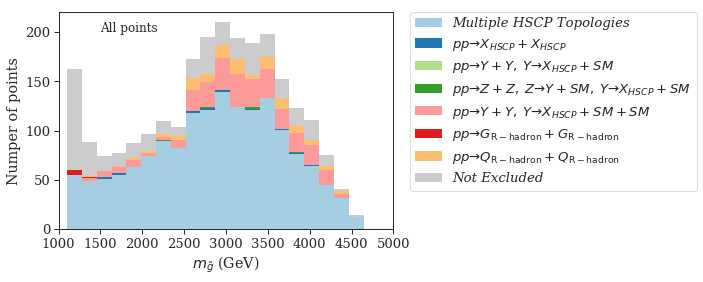

In [9]:
plt.figure()
xvals = [gDF['mass.1000021'] for gDF in groupedDF.values()]
nbins = 20
colors = sns.color_palette("Paired")[:len(xvals)]
colors[-1] = (0.8,0.8,0.8)
n, bins, patches = plt.hist(xvals,nbins,stacked=True, 
                            histtype='bar', label=[txDict[tx] for tx in groupedDF],
                            linewidth=0, color=colors)
lgd = plt.legend(fontsize=10,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,
                 prop={'family' :'serif','style' : 'italic'})
plt.xlim(1000.,5000.)
# plt.tight_layout()
plt.xlabel(r'$m_{\tilde{g}}$ (GeV)')
plt.ylabel('Numper of points')
plt.text(1500,200, 'All points', fontsize=12)
plt.savefig('Gravitino_txnames.png',dpi=500, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

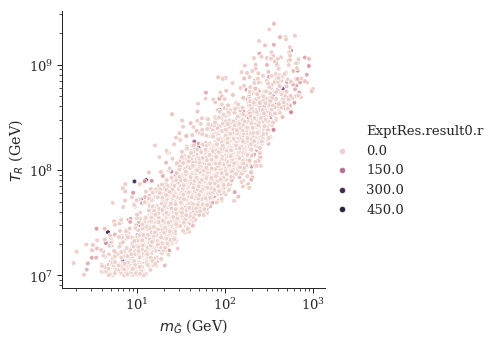

In [10]:
sns.relplot(x="mG",y="TR",data=dataDF,hue=dataDF['ExptRes.result0.r'])
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$m_{\tilde{G}}$ (GeV)')    
plt.ylabel(r'$T_{R}$ (GeV)')
# cb.set_label(r'$r=\sigma_{th}/\sigma_{UL}$')
# plt.ylim(1e6,1e10)
# plt.text(0,5e9, 'Non-excluded points', fontsize=12)
# plt.tight_layout()

plt.show()

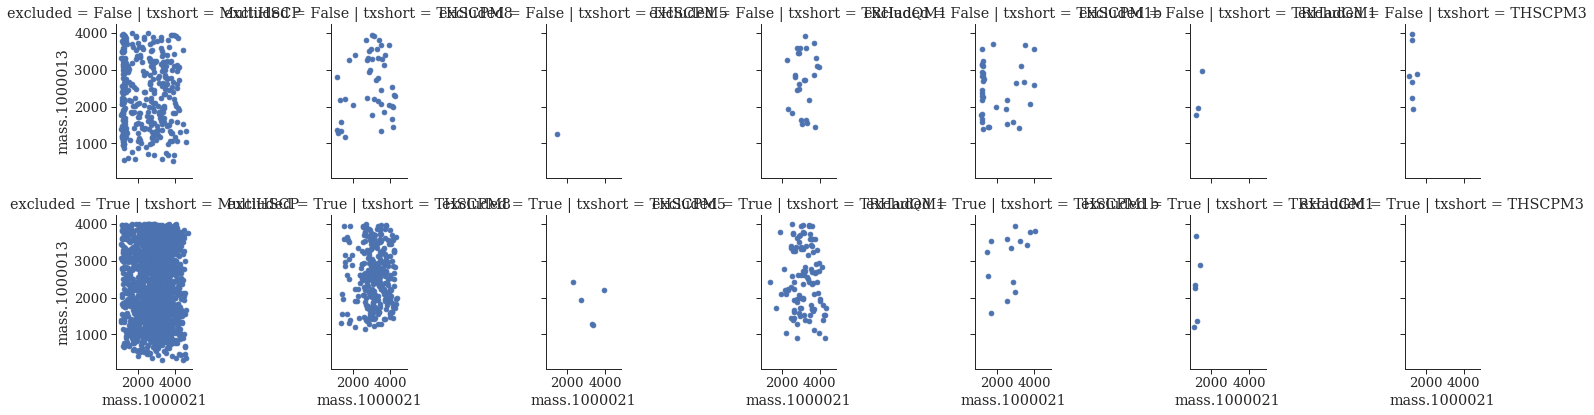

In [11]:
g = sns.FacetGrid(data=dataDF, col = "txshort", row='excluded')
g = g.map(plt.scatter, "mass.1000021","mass.1000013")
plt.show()

<Figure size 432x288 with 0 Axes>

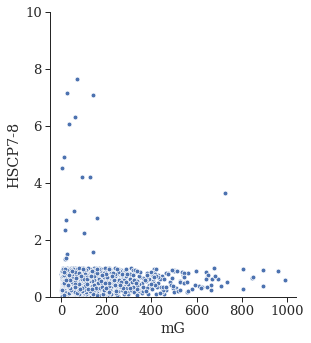

In [12]:
plt.figure()
sns.relplot(data=dataDF,x='mG',y='HSCP7-8')
plt.ylim(0.,10.)
plt.show()

In [13]:
dataDF[(dataDF['HSCP7-8'] > 1.)].shape

(50, 1011)

In [15]:
dataDF['mass.1000013'].min()

317.907302